<a href="https://colab.research.google.com/github/ulrikSebastienR/Colab-python-diaries/blob/master/PCA_Direct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#PCA algorithm step by step with python code 
#https://www.youtube.com/watch?v=xebPVQ1f7nM&t=4s
#https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb

In [0]:
import pandas as pd

In [3]:
df = pd.DataFrame(columns= ['Calorie', 'breakfast', 'lunch', 'dinner', 'exercise', 'Body_shape'])
print(df)
print(df.head())

Empty DataFrame
Columns: [Calorie, breakfast, lunch, dinner, exercise, Body_shape]
Index: []
Empty DataFrame
Columns: [Calorie, breakfast, lunch, dinner, exercise, Body_shape]
Index: []


In [4]:
df.loc[0] = [1200, 1, 0, 0, 2,'Skinny']
df.loc[1] = [2800, 1,1,1,1,'Normal']
df.loc[2] = [3500,2,1,1,0,'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] =  [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
print(df)
print(df.head())

  Calorie breakfast lunch dinner exercise Body_shape
0    1200         1     0      0        2     Skinny
1    2800         1     1      1        1     Normal
2    3500         2     1      1        0        Fat
3    1400         0     1      0        3     Skinny
4    5000         2     2      2        0        Fat
5    1300         0     0      1        2     Skinny
6    3000         1     0      1        1     Normal
7    4000         2     2      2        0        Fat
8    2600         0     2      0        0     Normal
9    3000         1     2      1        1        Fat
  Calorie breakfast lunch dinner exercise Body_shape
0    1200         1     0      0        2     Skinny
1    2800         1     1      1        1     Normal
2    3500         2     1      1        0        Fat
3    1400         0     1      0        3     Skinny
4    5000         2     2      2        0        Fat


In [5]:
#Split feature vectors : Representation is x
x = df[['Calorie', 'breakfast', 'lunch', 'dinner', 'exercise']]
print(type(x))
print(x)

<class 'pandas.core.frame.DataFrame'>
  Calorie breakfast lunch dinner exercise
0    1200         1     0      0        2
1    2800         1     1      1        1
2    3500         2     1      1        0
3    1400         0     1      0        3
4    5000         2     2      2        0
5    1300         0     0      1        2
6    3000         1     0      1        1
7    4000         2     2      2        0
8    2600         0     2      0        0
9    3000         1     2      1        1


In [6]:
#Split labels
y = df['Body_shape']
print(type(y))
print(y.head())
print(y)

<class 'pandas.core.series.Series'>
0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
Name: Body_shape, dtype: object
0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
5    Skinny
6    Normal
7       Fat
8    Normal
9       Fat
Name: Body_shape, dtype: object


In [7]:
# rescaling all feature vectors to have the same scale
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
print(type(x_std))
print(x_std)

<class 'numpy.ndarray'>
[[-1.35205803  0.         -1.32424438 -1.28571429  1.        ]
 [ 0.01711466  0.         -0.12038585  0.14285714  0.        ]
 [ 0.61612771  1.29099445 -0.12038585  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.12038585 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  1.08347268  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.32424438  0.14285714  1.        ]
 [ 0.18826125  0.         -1.32424438  0.14285714  0.        ]
 [ 1.04399418  1.29099445  1.08347268  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  1.08347268 -1.28571429 -1.        ]
 [ 0.18826125  0.          1.08347268  0.14285714  0.        ]]


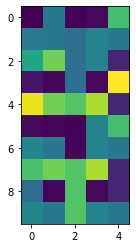

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_std)

In [0]:
import numpy as np

In [10]:
# features are stored in the columns but numpy covariance function
# numpy.cov applies only on rows so we need to transpose the standardized x.
features = x_std.T # T is same as transpose of the array
print(features)

[[-1.35205803  0.01711466  0.61612771 -1.18091145  1.89972711 -1.26648474
   0.18826125  1.04399418 -0.15403193  0.18826125]
 [ 0.          0.          1.29099445 -1.29099445  1.29099445 -1.29099445
   0.          1.29099445 -1.29099445  0.        ]
 [-1.32424438 -0.12038585 -0.12038585 -0.12038585  1.08347268 -1.32424438
  -1.32424438  1.08347268  1.08347268  1.08347268]
 [-1.28571429  0.14285714  0.14285714 -1.28571429  1.57142857  0.14285714
   0.14285714  1.57142857 -1.28571429  0.14285714]
 [ 1.          0.         -1.          2.         -1.          1.
   0.         -1.         -1.          0.        ]]


In [12]:
covariance_matrix = np.cov(features)
print(type(covariance_matrix))
print(covariance_matrix)

<class 'numpy.ndarray'>
[[ 1.11111111  0.88379717  0.72341627  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.34537215  0.81967902 -0.71721914]
 [ 0.72341627  0.34537215  1.11111111  0.40128618 -0.66881029]
 [ 0.89376551  0.81967902  0.40128618  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.66881029 -0.63492063  1.11111111]]


In [0]:
# computing eigen vectors and eigen values.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
print(eig_vals)

[3.96759543 0.89363477 0.06981086 0.24301862 0.38149587]


In [16]:
print(\n "Eigen Values", eig_vals)

SyntaxError: ignored